# CONCRETE STRENGTH MODEL

BU PROJEDE ELDEKİ VERİLER İLE BETONUN DAYANIKLILIĞINI TAHMİN ETMEYE ÇALIŞACAĞIZ AYNI ZAMANDA BETONU DAYANIKLILIĞINA GÖRE SINIFLARA AYIRIP 
YİNE ELDE OLAN VERİLERLE SINIFI TAHMİN ETMEYE ÇALIŞACAĞIZ.

SÜTUN İSİMLERİNİN ANLAMLARI:
+ Cement → Çimento

+ Slag → Cüruf (yüksek fırın cürufu)

+ FlyAsh → Uçucu kül

+ Water → Su

+ Plasticizer → Süper akışkanlaştırıcı (katkı maddesi)

+ CoarseAgg → İri agrega (çakıl, kırmataş vb.)

+ FineAgg → İnce agrega (kum vb.)

+ Age → Yaş (gün olarak, betonun bekleme süresi)

+ Strength → Basınç dayanımı (MPa)

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Concrete_Data.xls')

In [51]:
#EDA 

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer',  'CoarseAgg', 'FineAgg', 'Age', 'Strength']

In [5]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cement       1030 non-null   float64
 1   Slag         1030 non-null   float64
 2   FlyAsh       1030 non-null   float64
 3   Water        1030 non-null   float64
 4   Plasticizer  1030 non-null   float64
 5   CoarseAgg    1030 non-null   float64
 6   FineAgg      1030 non-null   float64
 7   Age          1030 non-null   int64  
 8   Strength     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
df.describe()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [10]:
df.corr()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
FlyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Plasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
CoarseAgg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FineAgg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [11]:
abs(df.corr()['Strength']).sort_values(ascending=False)

Strength       1.000000
Cement         0.497833
Plasticizer    0.366102
Age            0.328877
Water          0.289613
FineAgg        0.167249
CoarseAgg      0.164928
Slag           0.134824
FlyAsh         0.105753
Name: Strength, dtype: float64

In [12]:
#ELDEKİ VERİLER İLE FEATURE ENGINEERING YAPMAYA ÇALIŞALIM.

In [23]:
df['water_cement'] = df['Water'] / df['Cement']
df['water_binders'] =df['Water'] / (df['Cement'] + df['Slag'] + df['FlyAsh'])
df['aggs_binders'] =(df['CoarseAgg'] + df['FineAgg']) / (df['Cement'] + df['Slag'] + df['FlyAsh'])
df['total_binder'] = df['Cement'] + df['Slag'] + df['FlyAsh']
df['total_agg'] = df['CoarseAgg'] + df['FineAgg']
df['log_age'] = np.log(df['Age'])

In [24]:
abs(df.corr()['Strength']).sort_values(ascending=False)

Strength         1.000000
water_binders    0.623079
total_binder     0.613168
aggs_binders     0.565895
log_age          0.552185
water_cement     0.500700
Cement           0.497833
Plasticizer      0.366102
Age              0.328877
Water            0.289613
total_agg        0.259135
FineAgg          0.167249
CoarseAgg        0.164928
Slag             0.134824
FlyAsh           0.105753
Name: Strength, dtype: float64

In [52]:
#KORELASYONU 0.20 NİN ALTINDA OLAN SÜTUNLARI ÇIKARIYORUZ.

In [34]:
x = df.drop(['Strength','FineAgg','CoarseAgg','Slag','FlyAsh'],axis=1)
y= df[['Strength']]

In [53]:
#ZAFER ACAR HOCAYA AİT OLAN FONSKİYON İLE TÜM REGRESSYON MODELLERİNİ DENEYİP EN BAŞARILI OLANI GÖRMÜŞ OLUYORUZ.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [36]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.923773,4.431965,2.863776
Gradient Boosting,0.898644,5.110527,3.741063
Decision Tree,0.858875,6.030359,3.906344
SGD,0.842572,6.369158,5.100985
Ridge,0.842052,6.379671,5.125915
Linear,0.832011,6.579329,5.277496
AdaBoost,0.830859,6.601857,4.759833
Extra Tree,0.824559,6.723675,4.418734
SVR,0.823781,6.738566,5.060291
KNeighborsRegressor,0.801687,7.148531,5.781419


In [54]:
#EN BAŞARILI MODEL XGBREGRESSOR OLARAK GÖRÜLÜYOR. AŞAĞIDA BU MODELİ EĞİTİM METRICLER İLE BAŞARIMIZI KONTROL EDİYORUZ. 

In [42]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [43]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [44]:
xgb = XGBRegressor()

In [45]:
model = xgb.fit(x_train,y_train)

In [46]:
tahmin = model.predict(x_test)

In [47]:
r2_score(y_test,tahmin)

0.9237727522850037

In [49]:
mean_squared_error(y_test,tahmin)**0.5

4.431965291942818

In [50]:
mean_absolute_error(y_test,tahmin)

2.8637762137922342

In [55]:
#AYNI REGRESSYON PROBLEMİNİ DEEP LEARNING ILE DE ÇÖZMEYE ÇALIŞALIM.

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
model = Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [96]:
#DEEP LEARNING DE SCALE YAPMAK ÖNEMLİ OLDUĞU İÇİN X İ SCALE EDEREK X2 YE EŞİTLEDİK. ARDINDAN EARLYSTOP TANIMLADIK.
#BÖYLECE GEREKSİZ EPOCHS UN ÖNÜNE GEÇIYORUZ. RESTORE_BEST_WEIGHTS PARAMETRESİ İSE MODELİN EN İYİ OLDUĞU AĞIRLIKLARI GERİ YÜKLÜYOR EPOCH NEREDE BİTERSE BİTSİN.

In [90]:
from sklearn.preprocessing import StandardScaler
x2 = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x2,y,test_size=.20,random_state=42)

In [92]:
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [ ]:
history=model.fit(x_train,y_train, epochs=250, batch_size = 32, validation_data=(x_test,y_test), callbacks=[early_stop],verbose=1)

In [94]:
tahmin = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [95]:
r2_score(y_test,tahmin)

0.898160994052887

# AYNI PROJE İÇİN CLASSIFICATION MODELİ OLUŞTURALIM

 + PROJEDE İKİ ADET SÜTUN OLUŞTURMAMI İSTENİYOR. GREEN SÜTUNUNDA SLAG VE FLYASH SÜTUNUNUN TOPLAMININ 150'DEN KÜÇÜK OLDUĞU VE AYNI ZAMANDA
   PLASTICIZER SÜTUNUNUNDA 10'DAN DÜŞÜK OLMASI HALİNDE BU SÜTUNA N/A YAZILIYOR AKSİ HALDE GREEN YAZILIYOR.
 + ConcreteClass SÜTUNUNDA İSE STRENGTH SÜTUNUNUN 17'DEN , 28'DEN VE 70'DEN KÜÇÜK OLDUĞU HALLERDE SÜTUNLARA İSİMLER YAZIYOR. BUNLAR BETONLARIN
   DAYANILILIKLARINI İFADE EDİYOR.
   

In [97]:
def green_classifier(s):
    if (s.Slag + s.FlyAsh < 150.0) and (s.Plasticizer < 10.0):
        return "n/a"
    else:
        return "green"


def strength_classifer(x):
    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"


df["Green"] = df.apply(green_classifier, axis=1)
df["ConcreteClass"] = df.Strength.apply(strength_classifer)

In [99]:
df.sample(5)

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength,water_cement,total_binder,total_agg,log_age,water_binders,aggs_binders,Green,ConcreteClass
1003,366.00,187.0,0.00,191.30,6.60,824.3,756.90,28,65.909079,0.522678,553.00,1581.20,3.332205,0.345931,2.859313,green,commercial
784,331.00,0.0,0.00,192.00,0.00,879.0,825.00,3,13.520624,0.580060,331.00,1704.00,1.098612,0.580060,5.148036,n/a,non-structural
348,213.74,0.0,174.74,154.79,10.16,1053.5,776.35,100,50.076642,0.724198,388.48,1829.85,4.605170,0.398450,4.710281,green,commercial
811,310.00,0.0,0.00,192.00,0.00,970.0,850.00,28,27.923778,0.619355,310.00,1820.00,3.332205,0.619355,5.870968,n/a,residential
454,250.00,0.0,95.69,191.84,5.33,948.9,857.20,56,39.644870,0.767360,345.69,1806.10,4.025352,0.554948,5.224623,n/a,commercial


In [107]:
#BURADA PLASTICIZER SÜTUNUNDA Kİ VERİLERİ GREEN SÜTUNUNDA KULLANDIĞIMIZ İÇİN EVET YA DA HAYIR YAZIYORUZ SADECE.

In [100]:
df.Plasticizer = df.Plasticizer.apply(lambda x: "yes" if x > 0 else "no")

In [101]:
df.drop("Strength", axis=1, inplace=True)

In [102]:
df.sample(5)

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,water_cement,total_binder,total_agg,log_age,water_binders,aggs_binders,Green,ConcreteClass
208,212.07,0.00,121.62,180.31,yes,1057.6,779.32,100,0.850238,333.69,1836.92,4.605170,0.540352,5.504870,n/a,commercial
865,265.00,111.00,86.00,195.00,yes,833.0,790.00,28,0.735849,462.00,1623.00,3.332205,0.422078,3.512987,green,commercial
435,167.35,129.90,128.62,175.46,yes,1006.3,746.60,28,1.048461,425.87,1752.90,3.332205,0.412004,4.116045,green,commercial
810,310.00,0.00,0.00,192.00,no,970.0,850.00,7,0.619355,310.00,1820.00,1.945910,0.619355,5.870968,n/a,non-structural
410,172.38,13.61,172.37,156.76,yes,1006.3,856.40,3,0.909386,358.36,1862.70,1.098612,0.437437,5.197846,green,residential


In [108]:
#VERİLERİ X_C VE Y_C ŞEKLİNDE EĞİTİM VE TEST İÇİN AYIRIYORUZ.

In [103]:
x_c = df.drop(['ConcreteClass'],axis=1)
y_c = df[['ConcreteClass']]

In [109]:
#X_C DATASINDA KATEGORİK VERİLER OLMASI NEDENİYLE TÜM VERİLERİ SAYISAL VERİLERE DÖNÜŞTÜRÜYORUZ.

In [104]:
x_c = pd.get_dummies(x_c)

In [110]:
#ZAFER ACAR HOCAYA AİT FONKSİYON İLE TÜM CLAASIFICATION MODELLERİNİ DENEYEREK EN BAŞARILI OLANI SEÇİYORUZ. VE DİĞER MODELLERİN BAŞARILARINI GÖRÜYORUZ.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)


In [106]:
algo_test(x_c,y_c)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[104   0  16  13]
 [  5   0   1   0]
 [ 18   0  12   2]
 [ 24   0  10   1]]
LogisticRegression()  modeli eğitiliyor!..
[[122   0   0  11]
 [  6   0   0   0]
 [  3   0  26   3]
 [ 10   0   4  21]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[124   2   0   7]
 [  1   5   0   0]
 [  0   0  26   6]
 [  5   0   2  28]]
RandomForestClassifier()  modeli eğitiliyor!..
[[127   0   0   6]
 [  3   3   0   0]
 [  0   0  29   3]
 [  5   0   3  27]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[125   0   0   8]
 [  2   4   0   0]
 [  0   0  28   4]
 [  6   0   2  27]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[122   2   6   3]
 [  6   0   0   0]
 [  7   0  12  13]
 [ 16   0   8  11]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[112   9  12   0]
 [  1   5   0   0]
 [  6   0  26   0]
 [ 18   0  17   0]]
MultinomialNB()  modeli eğitiliyor!..
[[55 37 15 26]
 [ 1  5  0  0]
 [ 0  3 22  7]
 [ 0  5 10 20]]
Eğitim tamamlandı

,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.902913,0.902913,0.902913,0.902913
GradientBoostingClassifier,0.893204,0.893204,0.893204,0.893204
DecisionTreeClassifier,0.888350,0.888350,0.888350,0.888350
LogisticRegression,0.820388,0.820388,0.820388,0.820388
KNeighborsClassifier,0.703883,0.703883,0.703883,0.703883
AdaBoostClassifier,0.694175,0.694175,0.694175,0.694175
BernoulliNB,0.567961,0.567961,0.567961,0.567961
MultinomialNB,0.495146,0.495146,0.495146,0.495146


In [111]:
#EN BAŞARILI MODEL RANDOMFORESTCLASSIFIER OLDUĞU İÇİN BU MODELİ OLUŞTUYORUZ.

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [114]:
rf = RandomForestClassifier()

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size=.20, random_state = 42)

In [116]:
model = rf.fit(x_train,y_train)

In [117]:
tahmin = model.predict(x_test)

In [118]:
accuracy_score(y_test,tahmin)

0.8932038834951457

In [119]:
confusion_matrix(y_test, tahmin)

array([[124,   0,   0,   9],
       [  2,   4,   0,   0],
       [  0,   0,  29,   3],
       [  5,   0,   3,  27]], dtype=int64)

# AYNI CLASSIFICATION MODELİNİ DEEP LEARNING İLE MODELLEYELİM

In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [170]:
model_c = Sequential()
model_c.add(Dense(64,activation='relu'))
model_c.add(Dense(128,activation='relu'))
model_c.add(Dense(64,activation='relu'))
model_c.add(Dense(4,activation='softmax'))
model_c.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [171]:
x_c = df.drop(['ConcreteClass'],axis=1)
y_c = df[['ConcreteClass']]

In [172]:
x_c = pd.get_dummies(x_c)

In [173]:
from sklearn.preprocessing import LabelEncoder

In [181]:
#Y_C DATASI NI DATAFRAMEYE DÖNÜŞTÜRÜP KATEGORİK VERİLERİLERİ 0 1 2 3 OLARAK GÜNCELLİYORUZ.

In [174]:
y_c = pd.DataFrame(LabelEncoder().fit_transform(y_c))

In [175]:
from sklearn.preprocessing import StandardScaler
x_c = StandardScaler().fit_transform(x_c)
x_train, x_test, y_train, y_test=train_test_split(x_c,y_c,test_size=.20,random_state=42)

In [176]:
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [177]:
history=model_c.fit(x_train,y_train, epochs=250, batch_size = 32, validation_data=(x_test,y_test), callbacks=[early_stop],verbose=1)

Epoch 1/250
26/26 [==============================] - 1s 12ms/step - loss: 1.0771 - accuracy: 0.5655 - val_loss: 0.7629 - val_accuracy: 0.6990
Epoch 2/250
26/26 [==============================] - 0s 3ms/step - loss: 0.7417 - accuracy: 0.7367 - val_loss: 0.5680 - val_accuracy: 0.8155
Epoch 3/250
26/26 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7985 - val_loss: 0.4632 - val_accuracy: 0.8350
Epoch 4/250
26/26 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.8216 - val_loss: 0.3963 - val_accuracy: 0.8447
Epoch 5/250
26/26 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8422 - val_loss: 0.3551 - val_accuracy: 0.8592
Epoch 6/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.8362 - val_loss: 0.3287 - val_accuracy: 0.8544
Epoch 7/250
26/26 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.8580 - val_loss: 0.3243 - val_accuracy: 0.8592
Epoch 8/250


In [178]:
import matplotlib.pyplot as plt

In [182]:
# %93 LÜK BİR BAŞARI ELDE EDİLDİ. ACCURACY SKORU GÖRSELLEŞTİRİYORUZ.

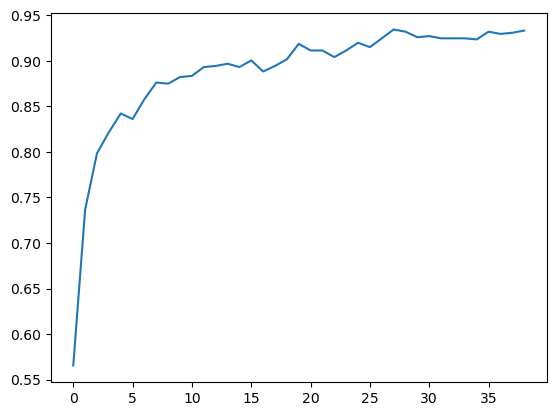

In [179]:
plt.plot(history.history['accuracy'])